In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib import style
import datetime as dt1
from datetime import datetime as dt

In [2]:
df=pd.read_csv('prices.csv')
df.tail()
df=df.loc[df['symbol'] == 'CNC']

              date symbol       open      close        low       high  \
848862  2016-12-23    CNC  58.220001  58.639999  57.759998  58.820000   
849362  2016-12-27    CNC  58.549999  58.639999  58.540001  59.139999   
849862  2016-12-28    CNC  58.560001  57.470001  57.209999  58.840000   
850362  2016-12-29    CNC  57.610001  56.830002  56.759998  58.009998   
850862  2016-12-30    CNC  56.830002  56.509998  55.889999  56.889999   

           volume  
848862   764500.0  
849362   643400.0  
849862   964000.0  
850362   920000.0  
850862  1246700.0  


In [3]:
from sklearn import preprocessing, svm
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import math

In [4]:
forecast_col = 'close'
df.fillna(value=-99999, inplace=True)
forecast_out = int(math.ceil(0.01 * len(df)))
df['label'] = df[forecast_col].shift(-forecast_out)

In [5]:
X = np.array(df.drop(['label','symbol','date'], axis=1))
X = preprocessing.scale(X)
X_lately = X[-forecast_out:]
X = X[:-forecast_out]
df.dropna(inplace=True)
y = np.array(df['label'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [6]:
clf = LinearRegression(n_jobs=-1)
clf.fit(X_train, y_train)
confidence = clf.score(X_test, y_test)
print(confidence)

0.8729818843593656


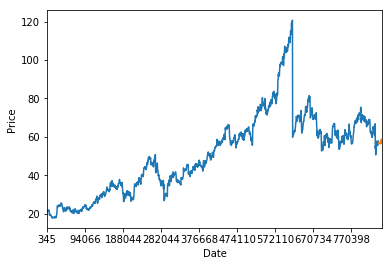

In [7]:
forecast_set = clf.predict(X_lately)
df['Forecast'] = np.nan
last_date = df.iloc[-1].date
last_date=dt.strptime(last_date, '%Y-%m-%d').timestamp()
last_unix = last_date
one_day = 86400
next_unix = last_unix + one_day

for i in forecast_set:
    next_date = dt.fromtimestamp(next_unix)
    next_unix += 86400
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]
df['close'].plot()
df['Forecast'].plot()
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [8]:
df

,date,symbol,open,close,low,high,volume,label,Forecast
345,2010-01-04,CNC,21.400000,21.700001,21.280001,21.750000,660000.0,19.250000,NaN
813,2010-01-05,CNC,21.740000,21.010000,20.990000,21.799999,848800.0,19.280001,NaN
1281,2010-01-06,CNC,20.950001,21.260000,20.920000,21.280001,543200.0,19.230000,NaN
1749,2010-01-07,CNC,21.260000,21.790001,21.160000,21.850000,760200.0,19.110001,NaN
2217,2010-01-08,CNC,21.629999,21.570000,21.290001,21.629999,598200.0,18.540001,NaN
2685,2010-01-11,CNC,21.580000,21.400000,21.280001,21.620001,418800.0,18.400000,NaN
3153,2010-01-12,CNC,21.230000,21.320000,21.090000,21.360001,443800.0,18.080000,NaN
3621,2010-01-13,CNC,21.389999,21.700001,21.340000,22.090000,3340600.0,18.299999,NaN
4089,2010-01-14,CNC,21.780001,22.000000,21.650000,22.150000,454400.0,18.020000,NaN
4557,2010-01-15,CNC,22.070000,22.040001,21.820000,22.219999,771200.0,17.980000,NaN


We can observe the forecast for some next days. From there we can observe that the forecast on '2016-12-06' is 56.917389.

Through this approach we can find the forecast for each and every company in the dataset.